# Examen Apprentissage Semi Supervisé

## Thème : Prédictions de ventes en details

# Import des librairies

In [1]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer

In [2]:
#Necessaire pour la compensation des données manquantes
pip install fancyimpute

SyntaxError: invalid syntax (1834876937.py, line 2)

# Chargement du jeux de données

In [4]:
# Charger les données
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
store_data = pd.read_csv('store.csv')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8428\2904785993.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('train.csv')


# Analyse Exploratoire

### Avant fusion des fichiers csv

In [31]:
train_data.shape

(1017209, 9)

In [33]:
train_data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [34]:
test_data.shape

(41088, 8)

In [37]:
train_data.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [38]:
test_data.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [41]:
store_data.shape

(1115, 10)

In [43]:
store_data.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

### Après Fusion 

In [6]:
# Fusionner les données d'entraînement avec les informations des magasins
train = pd.merge(train_data, store_data, on='Store')
test = pd.merge(test_data, store_data, on='Store')

In [7]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [11]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN


In [17]:
train.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

## Prétraitement

### Compensation données manquantes

In [12]:
# Mapper les mois à des valeurs numériques pour PromoInterval
month_map = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 
    'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 
    'Sept': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}

### Encodage

In [16]:
# Définition de la fonction pour encoder PromoInterval
def encode_promo_interval(interval):
    if pd.isna(interval):
        return np.nan
    elif isinstance(interval, str):
        months = interval.split(',')
        return np.mean([month_map[month] for month in months])
    else:
        return interval


In [18]:
# Appliquer la fonction à la colonne PromoInterval
store_data['PromoInterval'] = store_data['PromoInterval'].apply(encode_promo_interval)


In [20]:
# Imputer les valeurs manquantes avec KNN Imputer
from sklearn.impute import KNNImputer
columns_to_impute = ['CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 
                     'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']
imputer = KNNImputer(n_neighbors=5)
store_data[columns_to_impute] = imputer.fit_transform(store_data[columns_to_impute])


In [22]:
test['Open'].fillna(train['Open'].median(), inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8428\287135678.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Open'].fillna(train['Open'].median(), inplace=True)


In [24]:
# Fusion des jeux de données
train = pd.merge(train_data, store_data, on='Store')
test = pd.merge(test_data, store_data, on='Store')

# Encoder les variables catégorielles
label_encoders = {}
categorical_columns = ['StoreType', 'Assortment', 'StateHoliday']
for col in categorical_columns:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col].astype(str))
    test[col] = le.transform(test[col].astype(str))
    label_encoders[col] = le

In [26]:
# Convertir la colonne 'Date' en type datetime
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

# Créer des variables de temps
train['Year'] = train['Date'].dt.year
train['Month'] = train['Date'].dt.month
train['DayOfWeek'] = train['Date'].dt.dayofweek

test['Year'] = test['Date'].dt.year
test['Month'] = test['Date'].dt.month
test['DayOfWeek'] = test['Date'].dt.dayofweek

In [27]:
test.drop(columns=['Date'], inplace=True)
train.drop(columns=['Date'], inplace=True)

In [30]:
train.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month
0,1,4,5263,555,1,1,0,1,2,0,1270.0,9.0,2008.0,0,26.0,2011.8,6.5,2015,7
1,2,4,6064,625,1,1,0,1,0,0,570.0,11.0,2007.0,1,13.0,2010.0,5.5,2015,7
2,3,4,8314,821,1,1,0,1,0,0,14130.0,12.0,2006.0,1,14.0,2011.0,5.5,2015,7
3,4,4,13995,1498,1,1,0,1,2,2,620.0,9.0,2009.0,0,17.4,2013.2,6.7,2015,7
4,5,4,4822,559,1,1,0,1,0,0,29910.0,4.0,2015.0,0,26.2,2011.0,6.3,2015,7


In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 19 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int32  
 2   Sales                      1017209 non-null  int64  
 3   Customers                  1017209 non-null  int64  
 4   Open                       1017209 non-null  int64  
 5   Promo                      1017209 non-null  int64  
 6   StateHoliday               1017209 non-null  int32  
 7   SchoolHoliday              1017209 non-null  int64  
 8   StoreType                  1017209 non-null  int32  
 9   Assortment                 1017209 non-null  int32  
 10  CompetitionDistance        1017209 non-null  float64
 11  CompetitionOpenSinceMonth  1017209 non-null  float64
 12  CompetitionOpenSinceYear   1017209 non-null  float64
 13  Promo2      

## Exploration et analyse

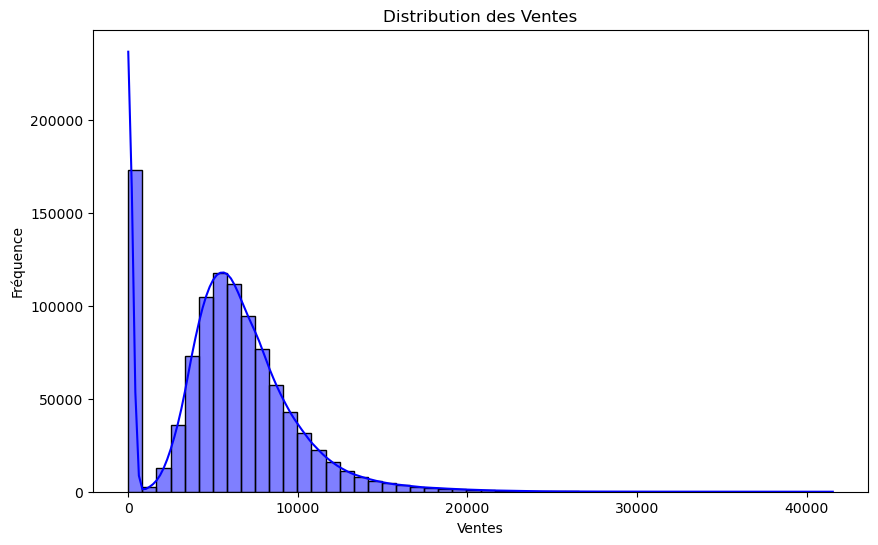

In [48]:
# Distribution des ventes
plt.figure(figsize=(10, 6))
sns.histplot(train['Sales'], bins=50, kde=True, color='blue')
plt.title('Distribution des Ventes')
plt.xlabel('Ventes')
plt.ylabel('Fréquence')
plt.show()

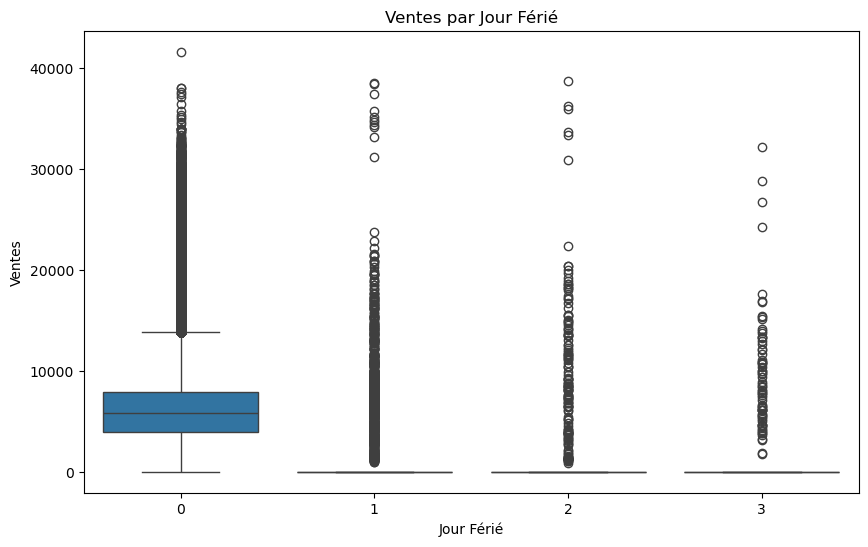

In [50]:
# Impact des jours fériés sur les ventes
plt.figure(figsize=(10, 6))
sns.boxplot(x='StateHoliday', y='Sales', data=train)
plt.title('Ventes par Jour Férié')
plt.xlabel('Jour Férié')
plt.ylabel('Ventes')
plt.show()

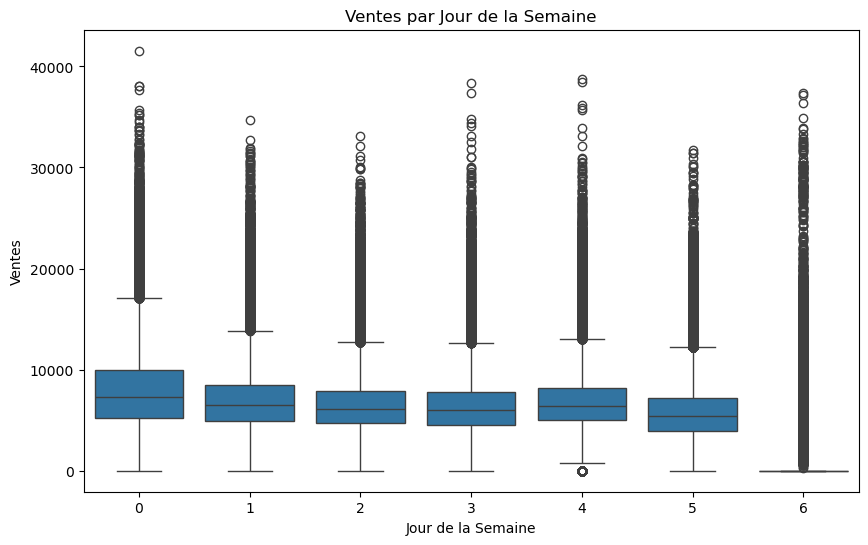

In [51]:
# Impact des jours de la semaine sur les ventes
plt.figure(figsize=(10, 6))
sns.boxplot(x='DayOfWeek', y='Sales', data=train)
plt.title('Ventes par Jour de la Semaine')
plt.xlabel('Jour de la Semaine')
plt.ylabel('Ventes')
plt.show()

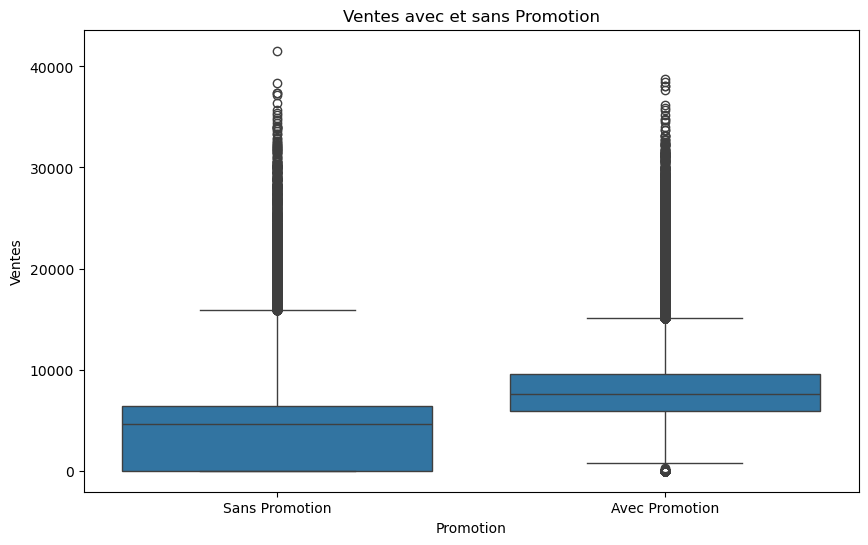

In [52]:
# Impact des promotions sur les ventes
plt.figure(figsize=(10, 6))
sns.boxplot(x='Promo', y='Sales', data=train)
plt.title('Ventes avec et sans Promotion')
plt.xlabel('Promotion')
plt.ylabel('Ventes')
plt.xticks([0, 1], ['Sans Promotion', 'Avec Promotion'])
plt.show()

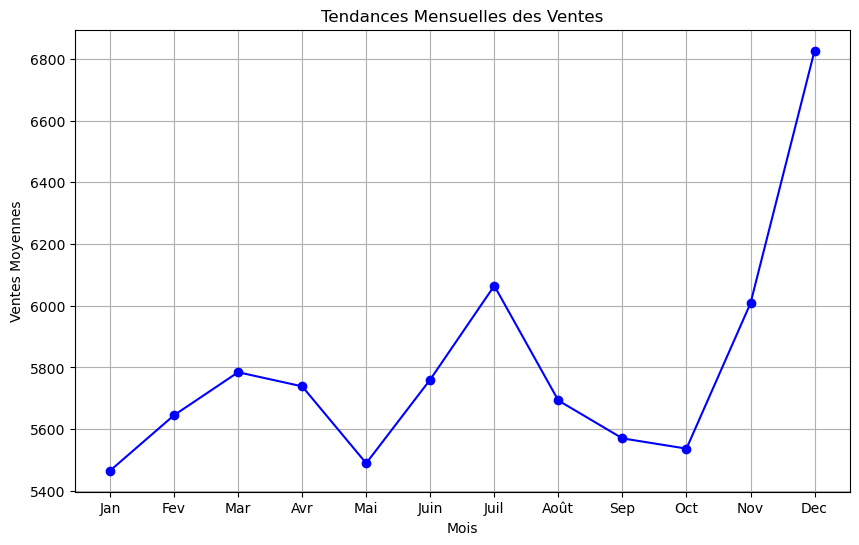

In [49]:
# Tendances temporelles des ventes par mois
monthly_sales = train.groupby('Month')['Sales'].mean()

plt.figure(figsize=(10, 6))
monthly_sales.plot(marker='o', color='b')
plt.title('Tendances Mensuelles des Ventes')
plt.xlabel('Mois')
plt.ylabel('Ventes Moyennes')
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Avr', 'Mai', 'Juin', 'Juil', 'Août', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

In [ ]:


# Sélectionner les colonnes numériques pour la matrice de corrélation
numeric_columns = train.select_dtypes(include=['int32','int64', 'float64']).columns

# Calculer la matrice de corrélation
correlation_matrix = train[numeric_columns].corr()

# Afficher la matrice de corrélation avec seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de Corrélation')
plt.show()

In [34]:
X = train.drop("Sales", axis=1)
y= train['Sales']


In [36]:
from sklearn.ensemble import RandomForestRegressor

# Initialiser le modèle de forêt aléatoire
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entraîner le modèle
rf_model.fit(X, y)

RandomForestRegressor(random_state=42)

In [37]:
from sklearn.ensemble import RandomForestRegressor

# Initialiser le modèle de forêt aléatoire
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entraîner le modèle
rf_model.fit(X, y)

RandomForestRegressor(random_state=42)

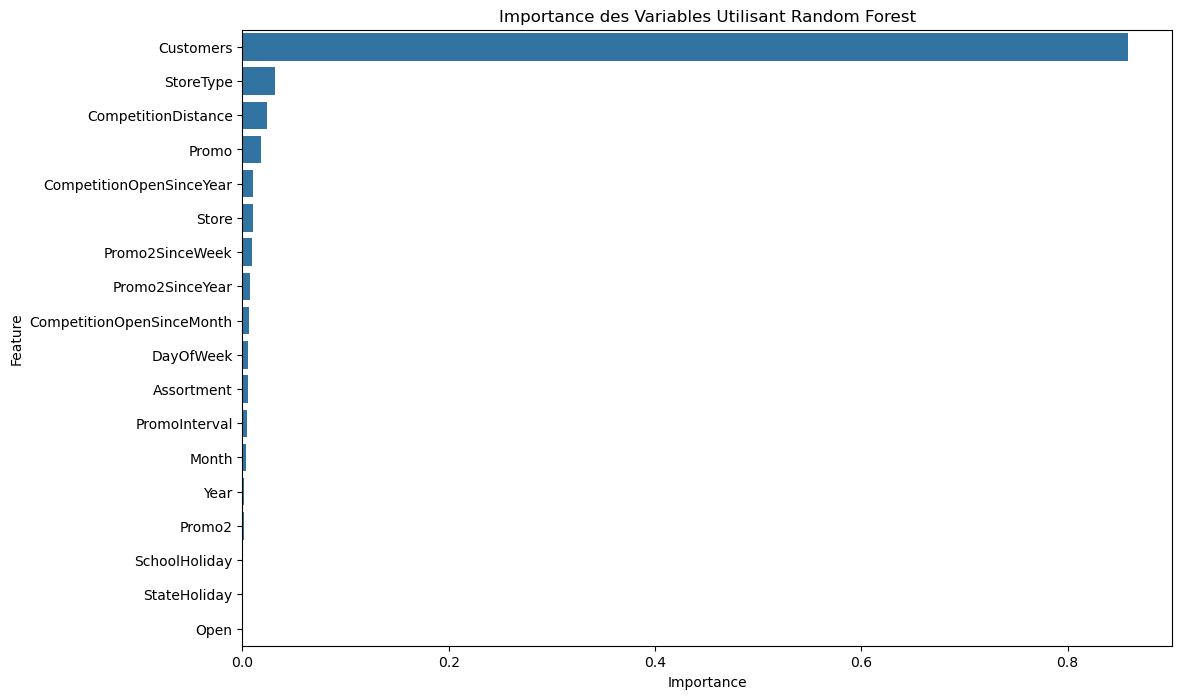

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extraire l'importance des variables
feature_importances = rf_model.feature_importances_
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Trier les caractéristiques par importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Visualiser l'importance des variables
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title('Importance des Variables Utilisant Random Forest')
plt.show()

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [49]:

# Charger les données
train = pd.read_csv('train.csv')

# Prétraitement des données
train['Date'] = pd.to_datetime(train['Date'])
train.fillna(0, inplace=True)
# Sélectionner les features pour le PCA
features = ['Store', 'Customers', 'Open', 'Promo', 'SchoolHoliday']
X = train[features]
# Standardiser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Réaliser le PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_scaled)
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

# Ajouter la cible 'Sales' pour la visualisation
finalDf = pd.concat([principalDf, train[['Sales']]], axis=1)

# Visualisation PCA
plt.figure(figsize=(10, 6))
plt.scatter(finalDf['PC1'], finalDf['PC2'], c=finalDf['Sales'], cmap='viridis')
plt.colorbar()
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('PCA des Ventes')
plt.show()

NameError: name 'StandardScaler' is not defined

# Modelisation

## Self Training

### Modele1: Linear Regression

In [115]:
# Séparer les données en données étiquetées et non étiquetées
X_train, X_unlabeled, y_train, y_unlabeled = train_test_split(X, y, test_size=0.85, random_state=42)

# Masquer les étiquettes des données non étiquetées

y_unlabeled[:] = np.nan

labeled_size =int(0.2 * len(X_train))
max_iter = 10

In [116]:
# Définition du modèle de régression linéaire
model = LinearRegression()

In [119]:
for _ in range(max_iter):
    # Entraînement sur les données étiquetées actuelles
    model.fit(X_train, y_train)
    
    # Prédiction sur les données non étiquetées
    y_pred_unlabeled = model.predict(X_unlabeled)

    # Ajout des prédictions les plus confiantes aux données étiquetées
    confidence = np.abs(y_pred_unlabeled)  # Utilisation de la valeur absolue des prédictions
    new_labeled_indices = np.argsort(-confidence)[:labeled_size]  # Tri par ordre décroissant

    # Sélectionner les nouvelles données étiquetées
    X_new_labeled = X_unlabeled.iloc[new_labeled_indices]  # Utilisation de iloc pour sélectionner par index
    y_new_labeled = y_pred_unlabeled[new_labeled_indices]

    # Ajouter les nouvelles données étiquetées à X_train et y_train
    X_train = pd.concat([X_train, X_new_labeled], ignore_index=True)
    y_train = np.hstack([y_train, y_new_labeled])

    # Supprimer les nouvelles données étiquetées de X_unlabeled et y_unlabeled
    X_unlabeled = X_unlabeled.drop(X_unlabeled.index[new_labeled_indices])
    y_unlabeled = np.delete(y_unlabeled, new_labeled_indices)

# Entraînement final sur toutes les données étiquetées
model.fit(X_train, y_train)

# Évaluation sur les données de test
# Séparation des données en données d'entraînement et données de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.85, random_state=42)
y_pred_test = model.predict(X_test)

# Calcul des métriques d'évaluation
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

# Affichage des résultats
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1944120.5950135926
R-squared: 0.8687668804231512


#### Interpretation

La régression linéaire a une erreur quadratique moyenne élevée, ce qui indique que les prédictions s'écartent considérablement des valeurs réelles. Cependant, un R-squared de 0.8669 montre que le modèle explique environ 87% de la variance des données, ce qui est raisonnable pour un modèle linéaire.

### Modele2: DecisionTreeRegressor

In [121]:
# Séparer les données en données étiquetées et non étiquetées
X_train, X_unlabeled, y_train, y_unlabeled = train_test_split(X, y, test_size=0.65, random_state=42)

# Masquer les étiquettes des données non étiquetées
y_unlabeled[:] = np.nan

labeled_size = int(0.2 * len(X_train))
max_iter = 10

In [122]:
#Decision tree
model = DecisionTreeRegressor()

In [125]:
for _ in range(max_iter):
    # Entraînement sur les données étiquetées actuelles
    model.fit(X_train, y_train)
    
    # Prédiction sur les données non étiquetées
    y_pred_unlabeled = model.predict(X_unlabeled)

    # Ajout des prédictions les plus confiantes aux données étiquetées
    confidence = np.abs(y_pred_unlabeled)  # Utilisation de la valeur absolue des prédictions
    new_labeled_indices = np.argsort(-confidence)[:labeled_size]  # Tri par ordre décroissant

    # Sélectionner les nouvelles données étiquetées
    X_new_labeled = X_unlabeled.iloc[new_labeled_indices]  # Utilisation de iloc pour sélectionner par index
    y_new_labeled = y_pred_unlabeled[new_labeled_indices]

    # Ajouter les nouvelles données étiquetées à X_train et y_train
    X_train = pd.concat([X_train, X_new_labeled], ignore_index=True)
    y_train = np.hstack([y_train, y_new_labeled])

    # Supprimer les nouvelles données étiquetées de X_unlabeled et y_unlabeled
    X_unlabeled = X_unlabeled.drop(X_unlabeled.index[new_labeled_indices])
    y_unlabeled = np.delete(y_unlabeled, new_labeled_indices)

# Entraînement final sur toutes les données étiquetées
model.fit(X_train, y_train)

# Évaluation sur les données de test
# Séparation des données en données d'entraînement et données de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.85, random_state=42)
y_pred_test = model.predict(X_test)

# Calcul des métriques d'évaluation
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

# Affichage des résultats
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 437137.9328367229
R-squared: 0.9704920699062205


#### Interpretation

L'arbre de décision a une MSE beaucoup plus faible que la régression linéaire, indiquant de meilleures prédictions. Un R-squared de 0.9618 montre que le modèle explique environ 96% de la variance, capturant les relations non linéaires présentes dans les données.

### Modele3: RandomForestRegressor

In [51]:
# Séparer les données en données étiquetées et non étiquetées
X_train, X_unlabeled, y_train, y_unlabeled = train_test_split(X, y, test_size=0.65, random_state=42)

# Masquer les étiquettes des données non étiquetées
y_unlabeled[:] = np.nan

labeled_size = int(0.2 * len(X_train))
max_iter = 10

In [52]:
#radom forest
model = RandomForestRegressor(n_estimators=20)


In [55]:
for _ in range(max_iter):
    # Entraînement sur les données étiquetées actuelles
    model.fit(X_train, y_train)
    
    # Prédiction sur les données non étiquetées
    y_pred_unlabeled = model.predict(X_unlabeled)

    # Ajout des prédictions les plus confiantes aux données étiquetées
    confidence = np.abs(y_pred_unlabeled)  # Utilisation de la valeur absolue des prédictions
    new_labeled_indices = np.argsort(-confidence)[:labeled_size]  # Tri par ordre décroissant

    # Sélectionner les nouvelles données étiquetées
    X_new_labeled = X_unlabeled.iloc[new_labeled_indices]  # Utilisation de iloc pour sélectionner par index
    y_new_labeled = y_pred_unlabeled[new_labeled_indices]

    # Ajouter les nouvelles données étiquetées à X_train et y_train
    X_train = pd.concat([X_train, X_new_labeled], ignore_index=True)
    y_train = np.hstack([y_train, y_new_labeled])

    # Supprimer les nouvelles données étiquetées de X_unlabeled et y_unlabeled
    X_unlabeled = X_unlabeled.drop(X_unlabeled.index[new_labeled_indices])
    y_unlabeled = np.delete(y_unlabeled, new_labeled_indices)

# Entraînement final sur toutes les données étiquetées
model.fit(X_train, y_train)

# Évaluation sur les données de test
# Séparation des données en données d'entraînement et données de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_pred_test = model.predict(X_test)

# Calcul des métriques d'évaluation
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

# Affichage des résultats
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 241201.15917525394
R-squared: 0.9836902776688927


#### Interpretation

Le Random Forest améliore encore les performances avec une MSE très faible et un R-squared de 0.9835, ce qui signifie que le modèle explique environ 98% de la variance des données. Cela montre que l'agrégation de plusieurs arbres réduit le surapprentissage et améliore la précision

# Co training

### Choix des modeles: Ridge et DecisionTreeRegressor

In [185]:
# Séparation des données en X1 et X2
X1 = X.iloc[:, :4]
X2 = X.iloc[:, 4:]  

In [187]:
# Séparer les données en données étiquetées et non étiquetées
X1_train, X1_unlabeled, X2_train, X2_unlabeled, y_train, y_unlabeled = train_test_split(
    X1, X2, y, test_size=0.65, random_state=42)

# Masquer les étiquettes des données non étiquetées
y_unlabeled[:] = np.nan

labeled_size = int(0.2 * len(X1_train))
max_iter = 10

In [190]:
# Initialisation des modèles
model1 = Ridge(alpha=1.0)
model2 = DecisionTreeRegressor()

In [192]:
for _ in range(max_iter):
    # Entraîner les modèles sur les données étiquetées actuelles
    model1.fit(X1_train, y_train)
    model2.fit(X2_train, y_train)
    
    # Prédiction sur les données non étiquetées
    y1_pred_unlabeled = model1.predict(X1_unlabeled)
    y2_pred_unlabeled = model2.predict(X2_unlabeled)

    # Calculer la confiance (peut-être besoin de quelque chose de plus sophistiqué selon le modèle)
    confidence1 = np.abs(y1_pred_unlabeled)
    confidence2 = np.abs(y2_pred_unlabeled)

    # Sélectionner les indices des prédictions les plus confiantes
    new_labeled_indices1 = np.argsort(-confidence1)[:labeled_size]
    new_labeled_indices2 = np.argsort(-confidence2)[:labeled_size]

    # Sélectionner les nouvelles données étiquetées
    X1_new_labeled = X1_unlabeled.iloc[new_labeled_indices1]
    X2_new_labeled = X2_unlabeled.iloc[new_labeled_indices2]
    y_new_labeled = y1_pred_unlabeled[new_labeled_indices1]

    # Ajouter les nouvelles données étiquetées à X1_train, X2_train et y_train
    X1_train = pd.concat([X1_train, X1_new_labeled], ignore_index=True)
    X2_train = pd.concat([X2_train, X2_new_labeled], ignore_index=True)
    y_train = np.hstack([y_train, y_new_labeled])

    # Supprimer les nouvelles données étiquetées de X1_unlabeled, X2_unlabeled et y_unlabeled
    X1_unlabeled = X1_unlabeled.drop(X1_unlabeled.index[new_labeled_indices1])
    X2_unlabeled = X2_unlabeled.drop(X2_unlabeled.index[new_labeled_indices2])
    y_unlabeled = np.delete(y_unlabeled, new_labeled_indices1)




In [193]:
# Entraîner les modèles finaux sur toutes les données étiquetées
model1.fit(X1_train, y_train)
model2.fit(X2_train, y_train)

# Diviser les données pour l'évaluation finale
X1_train, X1_test, X2_train, X2_test, y_train, y_test = train_test_split(
    X1_train, X2_train, y_train, test_size=0.2, random_state=42)

# Prédictions sur les données de test
y1_pred_test = model1.predict(X1_test)
y2_pred_test = model2.predict(X2_test)

# Calculer les métriques d'évaluation
mse1 = mean_squared_error(y_test, y1_pred_test)
r21 = r2_score(y_test, y1_pred_test)
mse2 = mean_squared_error(y_test, y2_pred_test)
r22 = r2_score(y_test, y2_pred_test)

print("Évaluation du modèle 1 (Regression Ridge) :")
print(f"Mean Squared Error: {mse1:.2f}")
print(f"R-squared: {r21:.2f}")

print("Évaluation du modèle 2 (Decision Tree Regressor) :")
print(f"Mean Squared Error: {mse2:.2f}")
print(f"R-squared: {r22:.2f}")

Évaluation du modèle 1 (Regression Ridge) :
Mean Squared Error: 875717.59
R-squared: 0.93
Évaluation du modèle 2 (Decision Tree Regressor) :
Mean Squared Error: 1762082.07
R-squared: 0.87


#### Interpretation

La régression de crête (Ridge) est une variante de la régression linéaire qui pénalise les grands coefficients pour éviter le surapprentissage. Avec une MSE de 875,717.27 et un R-squared de 0.93, elle montre une performance intermédiaire entre la régression linéaire et les arbres de décision, suggérant qu'elle gère mieux les relations linéaires avec régularisation.

Dans le cadre du co-training, l'arbre de décision a une MSE plus élevée et un R-squared plus faible que dans l'approche self-training. Cela pourrait indiquer que le co-training, en utilisant des modèles complémentaires, n'a pas pleinement exploité la capacité de l'arbre de décision dans ce cas spécifique.

# Utilisation du Random Forest Regressor pour completer le fichier test

Pour la prediction des ventes du fichier test, nous avons opter pour le Random Forest Regressor, qui presente un meilleur score.

In [60]:
test

,Id,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month
0,1,1,3,1.0,1,0,0,2,0,1270.0,9.0,2008.0,0,26.0,2011.8,6.5,2015,9
1,2,3,3,1.0,1,0,0,0,0,14130.0,12.0,2006.0,1,14.0,2011.0,5.5,2015,9
2,3,7,3,1.0,1,0,0,0,2,24000.0,4.0,2013.0,0,23.2,2012.0,6.1,2015,9
3,4,8,3,1.0,1,0,0,0,0,7520.0,10.0,2014.0,0,23.6,2011.6,5.9,2015,9
4,5,9,3,1.0,1,0,0,0,2,2030.0,8.0,2000.0,0,26.0,2010.6,6.5,2015,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,5,1.0,0,0,0,0,0,1900.0,6.0,2014.0,1,31.0,2013.0,5.5,2015,8
41084,41085,1112,5,1.0,0,0,0,2,2,1880.0,4.0,2006.0,0,19.8,2012.0,6.1,2015,8
41085,41086,1113,5,1.0,0,0,0,0,2,9260.0,5.4,2009.4,0,29.0,2010.4,6.3,2015,8
41086,41087,1114,5,1.0,0,0,0,0,2,870.0,7.0,2007.0,0,29.4,2012.8,5.7,2015,8


In [124]:
# Sélectionner les features pour le PCA
features = ['Store', 'Open', 'Promo', 'SchoolHoliday']
X = train[features]
# Standardiser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Séparer les données en données étiquetées et non étiquetées
X_train, X_unlabeled, y_train, y_unlabeled = train_test_split(X, y, test_size=0.65, random_state=42)

# Masquer les étiquettes des données non étiquetées
y_unlabeled[:] = np.nan

labeled_size = int(0.2 * len(X_train))
max_iter = 10
#radom forest
model = RandomForestRegressor(n_estimators=20)
for _ in range(max_iter):
    # Entraînement sur les données étiquetées actuelles
    model.fit(X_train, y_train)
    
    # Prédiction sur les données non étiquetées
    y_pred_unlabeled = model.predict(X_unlabeled)

    # Ajout des prédictions les plus confiantes aux données étiquetées
    confidence = np.abs(y_pred_unlabeled)  # Utilisation de la valeur absolue des prédictions
    new_labeled_indices = np.argsort(-confidence)[:labeled_size]  # Tri par ordre décroissant

    # Sélectionner les nouvelles données étiquetées
    X_new_labeled = X_unlabeled.iloc[new_labeled_indices]  # Utilisation de iloc pour sélectionner par index
    y_new_labeled = y_pred_unlabeled[new_labeled_indices]

    # Ajouter les nouvelles données étiquetées à X_train et y_train
    X_train = pd.concat([X_train, X_new_labeled], ignore_index=True)
    y_train = np.hstack([y_train, y_new_labeled])

    # Supprimer les nouvelles données étiquetées de X_unlabeled et y_unlabeled
    X_unlabeled = X_unlabeled.drop(X_unlabeled.index[new_labeled_indices])
    y_unlabeled = np.delete(y_unlabeled, new_labeled_indices)

# Entraînement final sur toutes les données étiquetées
model.fit(X_train, y_train)

# Évaluation sur les données de test
# Séparation des données en données d'entraînement et données de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_pred_test = model.predict(X_test)

# Calcul des métriques d'évaluation
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

# Affichage des résultats
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 1889515.5039339438
R-squared: 0.8722333121662431


In [127]:
# Sélectionner les features utilisées pour l'entraînement, en excluant 'Customers'
features = ['Store', 'Open', 'Promo', 'SchoolHoliday'] 

# Faire des prédictions
predictions = model.predict(test[features])

# Ajouter les prédictions au DataFrame de test
test['PredictedSales'] = predictions

# Sauvegarder les prédictions dans un fichier CSV
test[['Id', 'PredictedSales']].to_csv('predictions.csv', index=False)

In [129]:
predictions

array([ 5269.98741014,  8887.61628041, 10354.03222639, ...,
        5977.03664022, 19784.14388209,  5366.90861219])